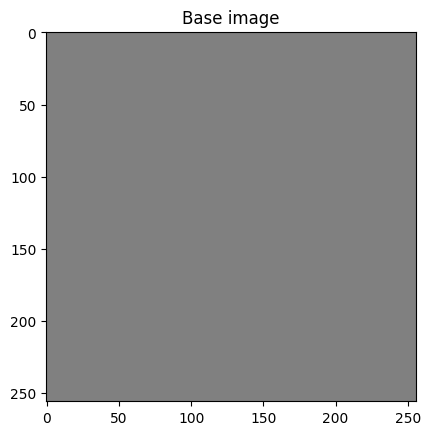

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Generate a 256x256 image with gray level 128.
baseImg = np.full((256, 256), 128, dtype=np.uint8)
plt.imshow(baseImg, vmin=0, vmax=255, cmap='gray')
plt.title('Base image');

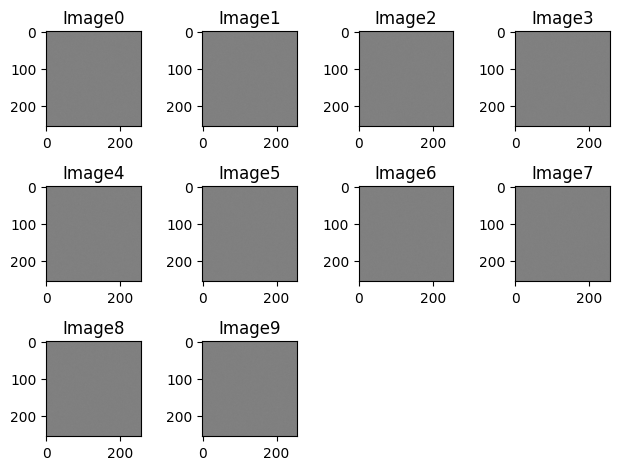

In [55]:
# Generate ten images with an additive noise.
imgs = []
for i in range(10):
    img = baseImg + 2 * np.random.randn(256, 256)
    img = np.uint8(img)
    imgs.append(img)
    plt.subplot(3, 4, i+1)
    plt.imshow(img, vmin=0, vmax=255, cmap='gray')
    plt.title(f'Image{i}')

plt.tight_layout()

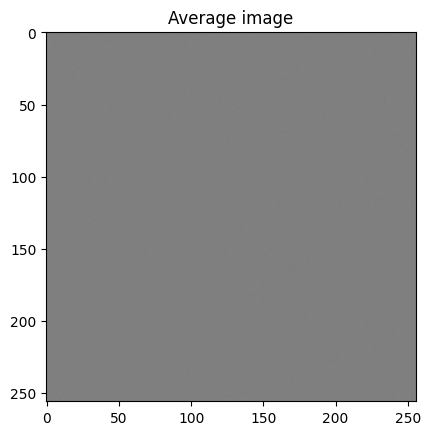

In [70]:
# Average of the images.
imgsDouble = np.array(imgs, dtype=np.uint8).astype(np.float64)
avg = sum(imgsDouble) / 10
plt.imshow(np.uint8(avg), vmin=0, vmax=255, cmap='gray')
plt.title('Average image');

Average sigma:  1.9691347582144418
Max sigma:  4.61398839279954


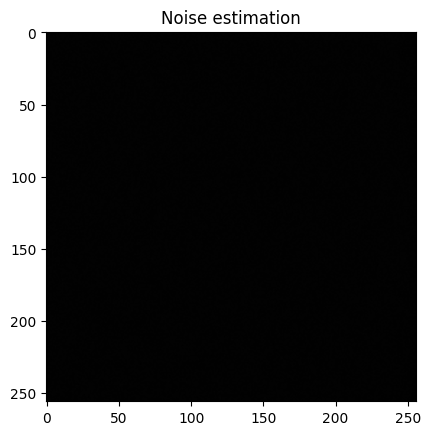

In [89]:
sigma = np.sqrt(sum([(avg - np.double(img)) ** 2 for img in imgs])/9)
plt.imshow(sigma, vmin=0, vmax=255, cmap='gray')
plt.title('Noise estimation')
print('Average sigma: ', np.mean(sigma))
print('Max sigma: ', np.max(sigma))

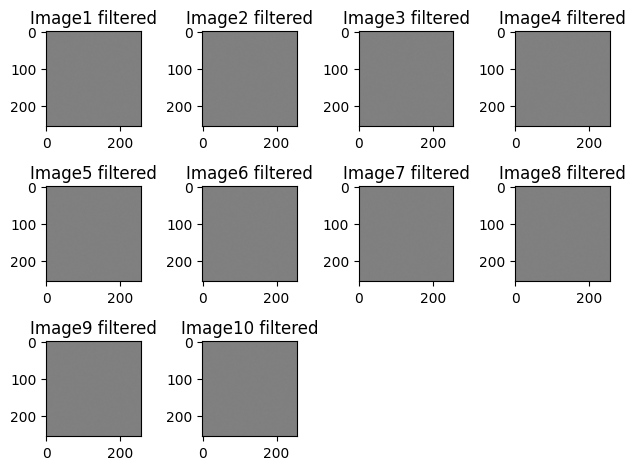

In [85]:
def BoxFilter(img):
    kernel = np.ones((3, 3), dtype=np.float32) / 9
    filteredImg = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_REPLICATE)
    return filteredImg.astype(np.uint8)
    
# Apply box filter.
filteredImgs = [BoxFilter(img) for img in imgs]
for i, filteredImg in enumerate(filteredImgs, start=1):
    plt.subplot(3, 4, i)
    plt.imshow(filteredImg, vmin=0, vmax=255, cmap='gray')
    plt.title(f'Image{i} filtered')

plt.tight_layout()

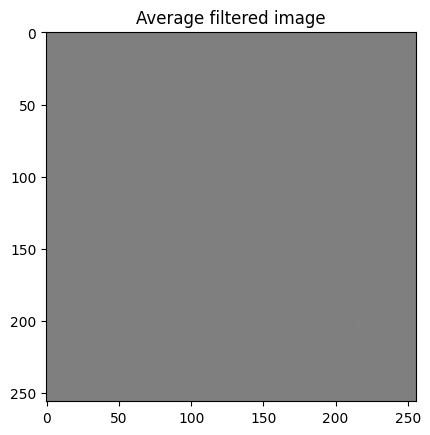

In [86]:
# Average of the filtered images.
filteredImgsDouble = np.array(filteredImgs, dtype=np.uint8).astype(np.float64)
filteredAvg = sum(filteredImgsDouble) / 10
plt.imshow(np.uint8(filteredAvg), vmin=0, vmax=255, cmap='gray')
plt.title('Average filtered image');

Average filtered sigma:  0.7160084914001019
Max filtered sigma:  1.5951314818673863


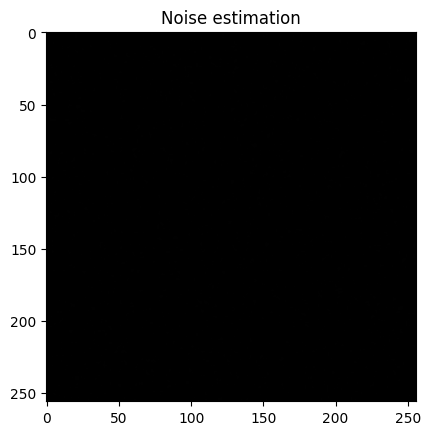

In [88]:
filteredSigma = np.sqrt(sum([(filteredAvg - np.double(img)) ** 2 for img in filteredImgs])/9)
plt.imshow(filteredSigma, vmin=0, vmax=255, cmap='gray')
plt.title('Noise estimation')
print('Average filtered sigma: ', np.mean(filteredSigma))
print('Max filtered sigma: ', np.max(filteredSigma))